**Import Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load data**

In [3]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Basic EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.duplicated().sum()

np.int64(723)

**Plot target distribution (Matplotlib)**

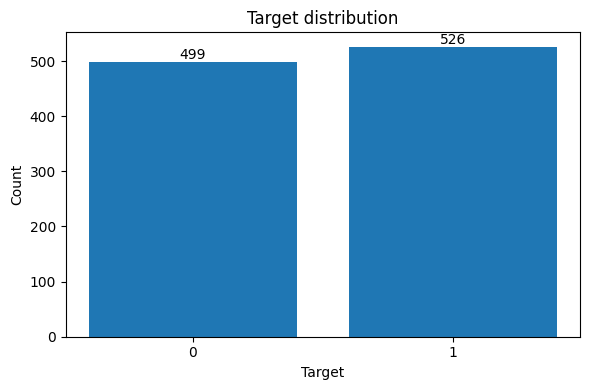

In [11]:
counts = df['target'].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution")
plt.xlabel("Target")
plt.ylabel("Count")
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, str(v), ha="center")
plt.tight_layout()
plt.show()

**Correlation matrix plotted using matplotlib**

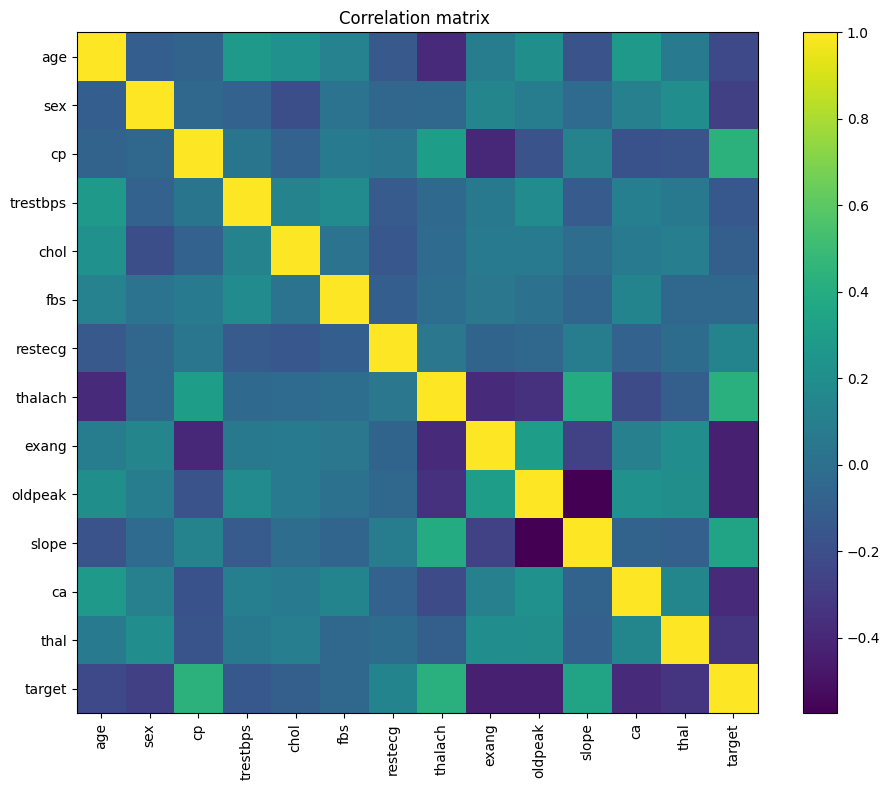

In [13]:
corr = df.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation matrix ")
plt.tight_layout()
plt.show()

 **Train test split and scaling**

In [14]:
X = df.drop(columns=['target'])
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Fit scaler on train numeric columns only
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [17]:
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

**Baseline Decision Tree**

In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

print("\nDecision Tree (default) Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report (DT default):\n", classification_report(y_test, y_pred))


Decision Tree (default) Accuracy: 0.9853658536585366

Classification report (DT default):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Plot the default tree**

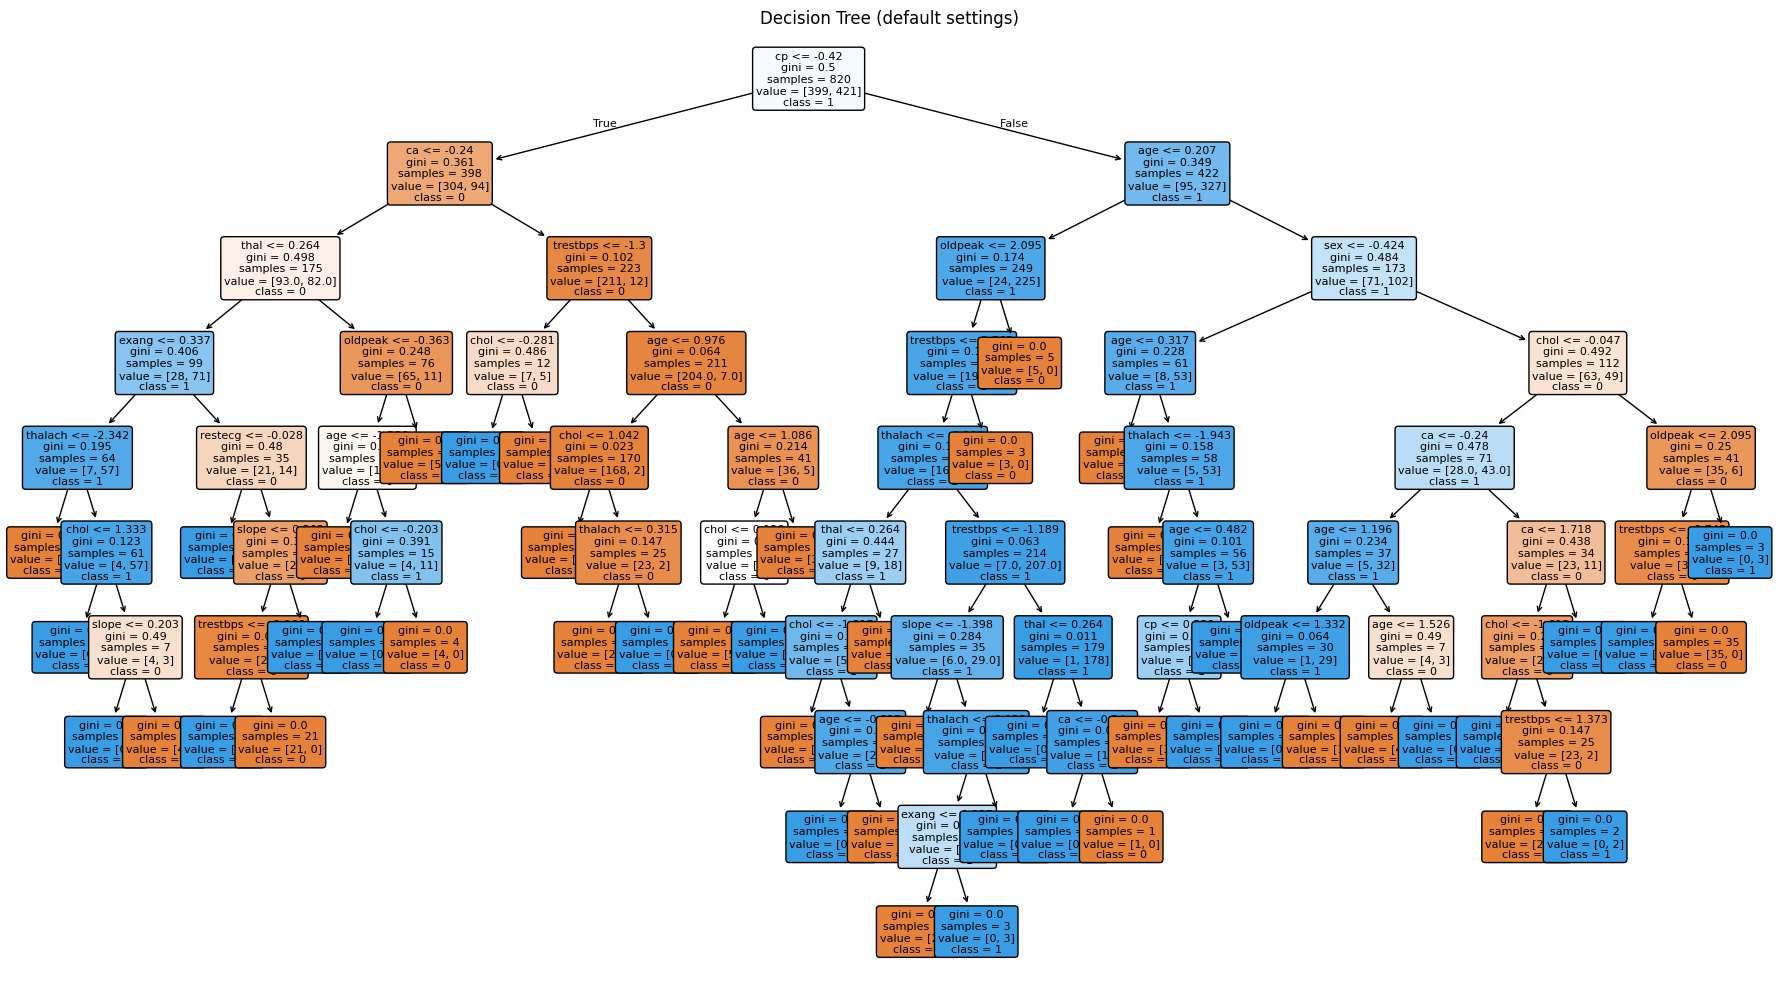

In [19]:
plt.figure(figsize=(18,10))
plot_tree(dt, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree (default settings)")
plt.tight_layout()
plt.show()

**Overfitting analysis: vary max_depth**

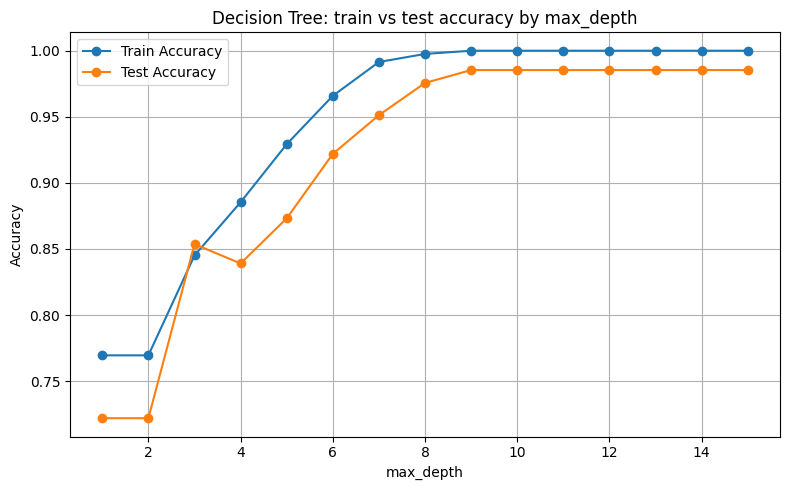

In [20]:
depths = list(range(1, 16))
train_scores = []
test_scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_scaled, y_train)
    train_scores.append(clf.score(X_train_scaled, y_train))
    test_scores.append(clf.score(X_test_scaled, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: train vs test accuracy by max_depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**GridSearchCV to find best max_depth (5-fold)**

In [21]:
param_grid = {'max_depth': list(range(1, 16))}
gscv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gscv.fit(X_train_scaled, y_train)
print("\nBest DecisionTree max_depth:", gscv.best_params_, " Best CV score:", gscv.best_score_)


Best DecisionTree max_depth: {'max_depth': 11}  Best CV score: 0.9890243902439024


**Train best DT**

In [22]:
best_dt = DecisionTreeClassifier(max_depth=gscv.best_params_['max_depth'], random_state=42)
best_dt.fit(X_train_scaled, y_train)
y_pred_best = best_dt.predict(X_test_scaled)
print("\nDecision Tree (tuned) Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification report (DT tuned):\n", classification_report(y_test, y_pred_best))


Decision Tree (tuned) Accuracy: 0.9853658536585366

Classification report (DT tuned):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Visualize tuned tree**

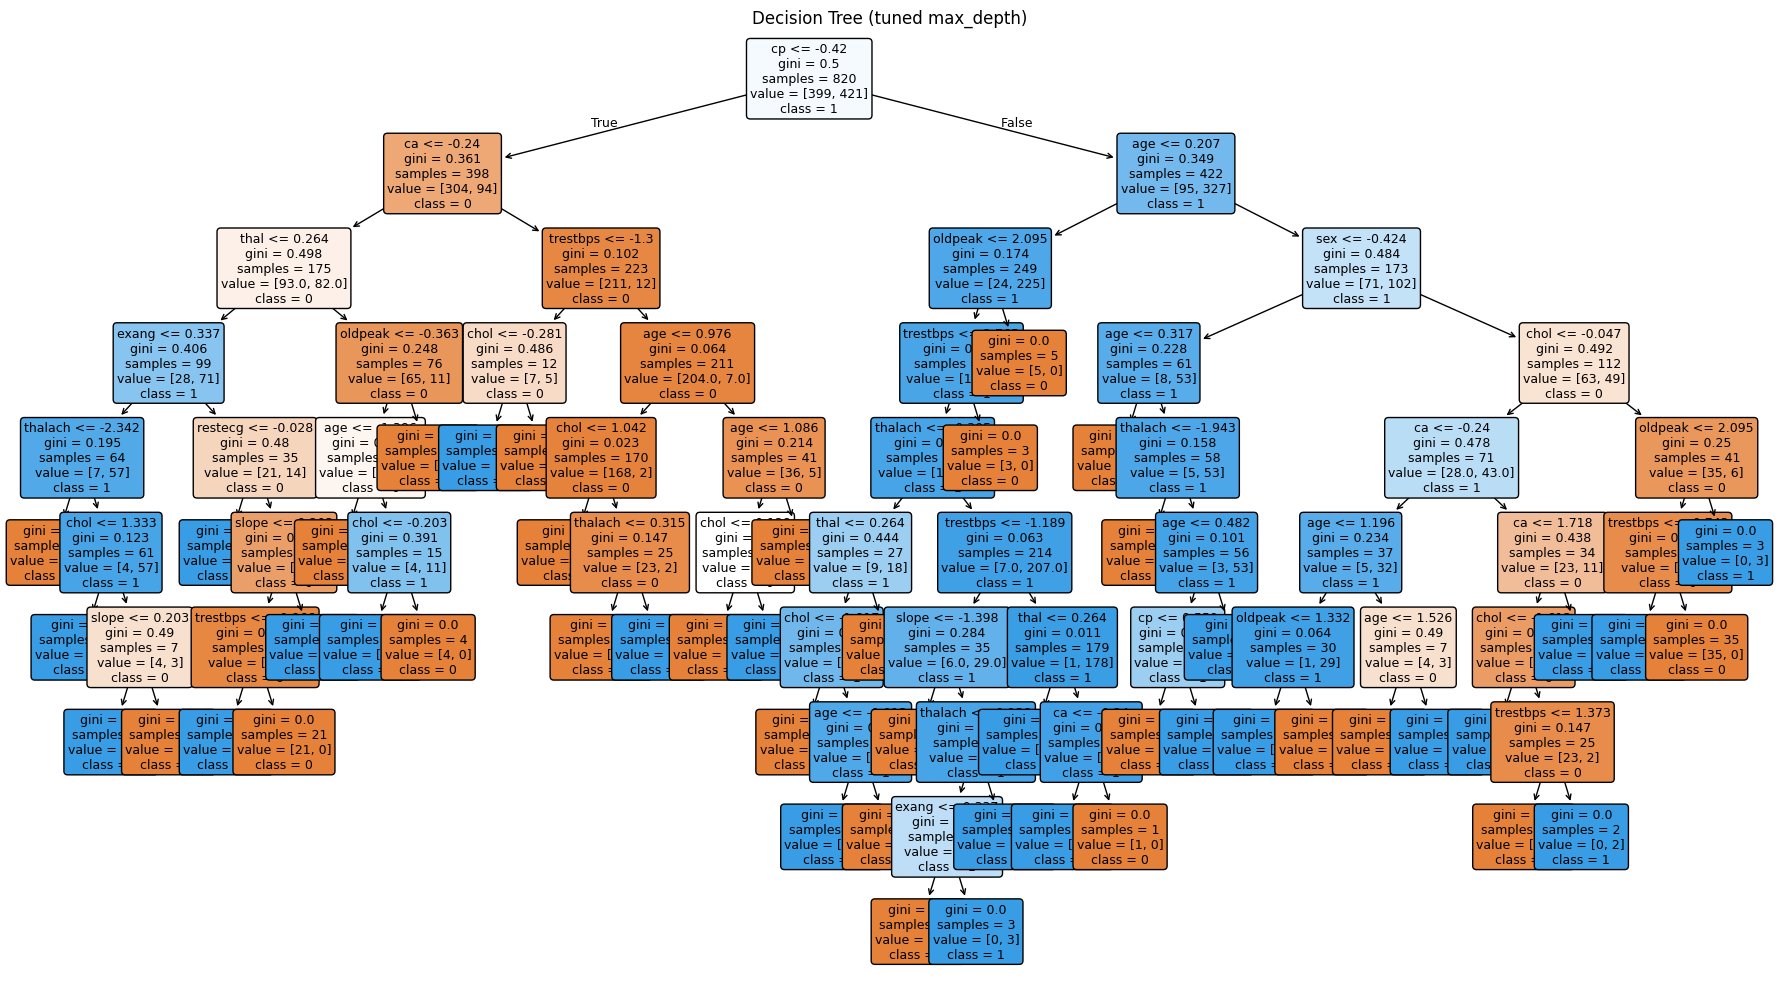

In [24]:
plt.figure(figsize=(18,10))
plot_tree(best_dt, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)],
          filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree (tuned max_depth)")
plt.tight_layout()
plt.show()

**Random Forest training & comparison**

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification report (RF):\n", classification_report(y_test, y_pred_rf))
print("Decision Tree tuned Accuracy (for comparison):", accuracy_score(y_test, y_pred_best))


Random Forest Accuracy: 1.0

Classification report (RF):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Decision Tree tuned Accuracy (for comparison): 0.9853658536585366


**Feature importances (RF)**

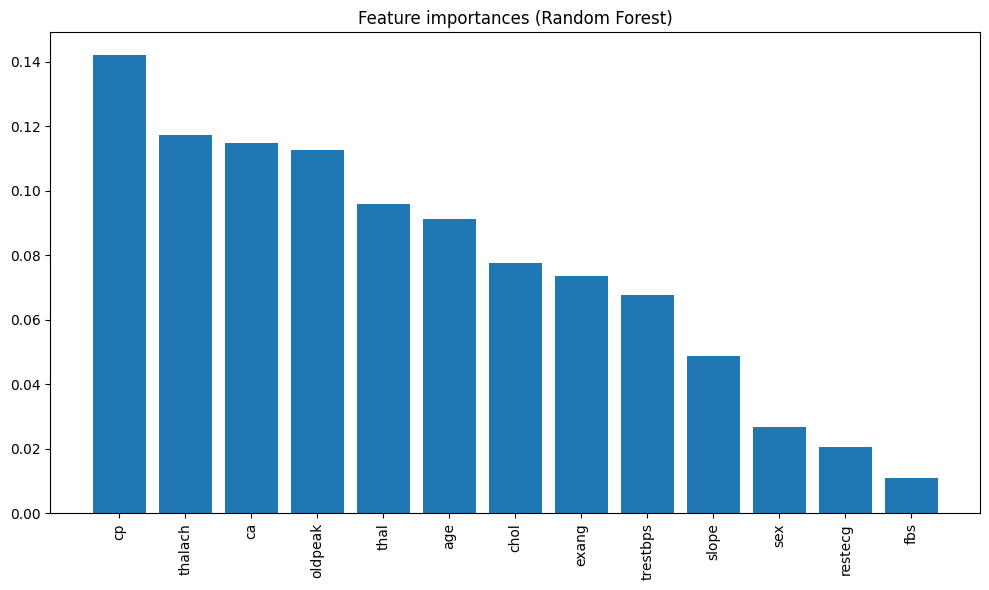


Feature importances (RF):
      feature  importance
2         cp    0.142094
7    thalach    0.117349
11        ca    0.114844
9    oldpeak    0.112634
12      thal    0.095930
0        age    0.091285
4       chol    0.077771
8      exang    0.073707
3   trestbps    0.067765
10     slope    0.048711
1        sex    0.026682
6    restecg    0.020438
5        fbs    0.010790


In [27]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.title("Feature importances (Random Forest)")
plt.tight_layout()
plt.show()

fi_df = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False)
print("\nFeature importances (RF):\n", fi_df)

**Cross-validation (RF)**

In [30]:
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1) #5-fold is a common default in ML
print("\nRandom Forest CV scores (5-fold):", cv_scores)
print("Mean CV accuracy (RF):", cv_scores.mean())


Random Forest CV scores (5-fold): [0.95121951 0.98780488 0.98780488 0.98170732 1.        ]
Mean CV accuracy (RF): 0.9817073170731707


In [32]:
# Compare the performance of the tuned Decision Tree and Random Forest models
print("\nBest performing model:")
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_best):
    print("Random Forest")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
else:
    print("Tuned Decision Tree")
    print("Accuracy:", accuracy_score(y_test, y_pred_best))


Best performing model:
Random Forest
Accuracy: 1.0
